In [15]:
# Matplotlib - 2D plotting library
from matplotlib import pyplot as plt
from matplotlib import rcParams

# Show matplotlib figures inline the notebook
%matplotlib inline

# Pandas - High-performance data analysis
import pandas

# Glob - Unix style pathname pattern expansion
# Used to aggregate folders and files into a single list so they can be iterated over
import glob

# Numpy - For handling of large, multi-dimensional arrays and matrices
import numpy as np

# Scipy - For accurate integration
from scipy.integrate import simps
from scipy.integrate import trapz

##########################################################################################
# Setting rcParams for publication quality graphs
fig_width_pt = 246.0                    # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # Width in inches
fig_height = fig_width*golden_mean      # Height in inches
fig_size =  [fig_width, fig_height]
# fig_size =  [7.3,4.2]
fig_size =  [7.3*1.5,4.2*1.5]
# fig_size =  [7.3*2,4.2*2]
params = {'backend': 'pdf',
        'axes.labelsize': 20,
        'legend.fontsize': 18,
        'xtick.labelsize': 15,
        'ytick.labelsize': 15,
        'xtick.major.size': 9,
        'xtick.major.width': 1,
        'xtick.minor.size': 5,
        'xtick.minor.width': 1,
        'ytick.major.size': 9,
        'ytick.major.width': 1,
        'ytick.minor.size': 5,
        'ytick.minor.width': 1,
        'font.family': 'times-new-roman',
        'font.sans-serif': 'Times New Roman',
        'font.size': 12,
        'text.usetex': True,
        'figure.figsize': fig_size}

# Update rcParams
rcParams.update(params)

In [2]:
##########################################################################################
# Energy of incident (input) particles
InputEnergies = np.array([#np.linspace(100,900, num=9, endpoint=True, dtype = int),
                          np.linspace(1000,9000, num=9, endpoint=True, dtype = int),
                          np.linspace(10000,90000, num=9, endpoint=True, dtype = int),
                            ]).flatten()
for i in range(1,6):
    InputEnergies = np.insert(InputEnergies, [i+17], [100000*i])
    
DataFolder = '../../G4AdEPTCubeSat_Results/Ar+CS2/4U/Protons_4U/'

##########################################################################################
# Energy thresholds (in eV) for events that will be included in the analysis
Thr_Gas = 100.
print InputEnergies

[  1000   2000   3000   4000   5000   6000   7000   8000   9000  10000
  20000  30000  40000  50000  60000  70000  80000  90000 100000 200000
 300000 400000 500000]


In [3]:
##########################################################################################
# Load the simulation data for each input energy
Data = []

for InputEnergy in InputEnergies:
    # Create data file template from current energy 
    if InputEnergy <= 9000:
        DataFilename = 'proton_' + str(InputEnergy) + 'keV_Nr_100000000_ISO_4U_nt_G4AdEPTCubeSat_t[0-7].csv'
    else:
        DataFilename = 'proton_' + str(InputEnergy) + 'keV_Nr_1000000_ISO_4U_nt_G4AdEPTCubeSat_t[0-7].csv'
    # Statistics variables for each input energy data
    nPos = 0
    nElec = 0
    nSubPos = 0
    nSubElec = 0
    nTotal = 0
    nSubThr = 0
    nCompton = 0
    nPair = 0
    nPhoto = 0
    nTriton = 0
    
    # Print energy 
    print '\n------------------------------------------------------------'
    print 'Energy: \t\t', str(InputEnergy), 'keV'

    ##########################################################################################
    # Process the simulation data files
    # Column 0 - Total energy deposited in the sensitive gas volume [eV]
    # Column 1 - Energy deposited by positrons in the sensitive gas volume [eV]
    # Column 2 - Energy deposited by positrons in the sensitive gas volume [eV]
    # Column 3 - Energy deposited by tritons in the sensitive gas volume [eV]
    # Column 4 - Track length of particles in the sensitive gas volume [mm]
    # Column 5 - Number of secondary electrons generated in the sensitive gas volume
    # Column 6 - Number of secondary photons generated in the sensitive gas volume
    # Column 7 - Number of secondary positrons generated in the sensitive gas volume
    # Column 8 - Number of secondary tritons generated in the sensitive gas volume
    for dataFile in glob.glob(DataFolder + DataFilename):
        # Readout CSV files
        try:
            dataFrame = pandas.read_csv(dataFile, usecols=[0,1,2,3,4,5,6,7,8], comment="#", error_bad_lines=False, skip_blank_lines=True).values

            # Determine the interaction type
            for i in range(1,len(dataFrame)):
                if dataFrame[i,0] > Thr_Gas:
    #                 if dataFrame[i,8] > 0:
    #                     nTriton += 1
                    if dataFrame[i,7] > 0 and dataFrame[i,5] > 0:
                        nPair += 1
                    else:
                        if dataFrame[i,6] > 0. and dataFrame[i,5] > 0.:
                            nCompton += 1
                        else:
                            nPhoto += 1

            # Increment statistics
            nPos += dataFrame[(dataFrame[:,1] > Thr_Gas),0].size
            nElec += dataFrame[(dataFrame[:,2] > Thr_Gas),0].size
            nSubPos += dataFrame[(dataFrame[:,1] <= Thr_Gas),0].size
            nSubElec += dataFrame[(dataFrame[:,2] <= Thr_Gas),0].size
            nTotal += dataFrame[(dataFrame[:,0] > Thr_Gas),0].size
            nSubThr += dataFrame[(dataFrame[:,0] <= Thr_Gas),0].size
        except:
            pass
        
    # Add statistics to data list (Convert to numpy array later)
    Data.append([InputEnergy,nPos,nElec,nSubPos,nSubElec,nTotal,nSubThr,nCompton,nPair,nPhoto,nTriton])
        
    # Print statistics
    print '------------------------------------------------------------'
    print 'Number of events above threshold: \t', nTotal
    print 'Number of events below threshold: \t', nSubThr
    print 'Number of Pair Production events: \t', nPair
    print '------------------------------------------------------------'
    
# Convert statistics list to Numpy array
Data = np.asarray(Data)


------------------------------------------------------------
Energy: 		1000 keV
------------------------------------------------------------
Number of events above threshold: 	0
Number of events below threshold: 	0
Number of Pair Production events: 	0
------------------------------------------------------------

------------------------------------------------------------
Energy: 		2000 keV
------------------------------------------------------------
Number of events above threshold: 	1
Number of events below threshold: 	0
Number of Pair Production events: 	0
------------------------------------------------------------

------------------------------------------------------------
Energy: 		3000 keV
------------------------------------------------------------
Number of events above threshold: 	15
Number of events below threshold: 	0
Number of Pair Production events: 	0
------------------------------------------------------------

--------------------------------------------------------

In [4]:
##########################################################################################
# Calculate the geometry factor (G) assuming an isotropic radiation environment.
# The detector is centered on, and encircled by, a spherical source of radius (R) and
# with N_R simulated particles distributed uniformly along the inner surface.

# Source information (Get this from the Geant4 simulation!!)
N_R = 100000000.
N_R_2 = 1000000.
R = 10.

# Calculate the geometry factors
G_Pair = Data[:,8]/N_R*4*(np.pi**2)*(R**2)


G_Total_1 = Data[:9,5]/N_R*4*(np.pi**2)*(R**2)
G_Total_2 = Data[9:,5]/N_R_2*4*(np.pi**2)*(R**2)
G_Total = np.array([])
G_Total = np.append(G_Total_1,G_Total_2)

# Calculate the errors for geometry factors 
err_G_Total = 4*(np.pi**2)*(R**2)*np.sqrt((1-Data[:,5]/N_R)*Data[:,5]/N_R**2)
err_G_Pair = 4*(np.pi**2)*(R**2)*np.sqrt((1-Data[:,8]/N_R)*Data[:,8]/N_R**2)

# Calculate relative errors for the geometry factors
relErr_G_Total = err_G_Total/G_Total
relErr_G_Pair = err_G_Pair/G_Pair

print InputEnergies[:9]

[1000 2000 3000 4000 5000 6000 7000 8000 9000]


Plot saved to: ../../G4AdEPTCubeSat_Results/Ar+CS2/4U/Protons_4U/Geometric_Factor_Proton_4U.pdf


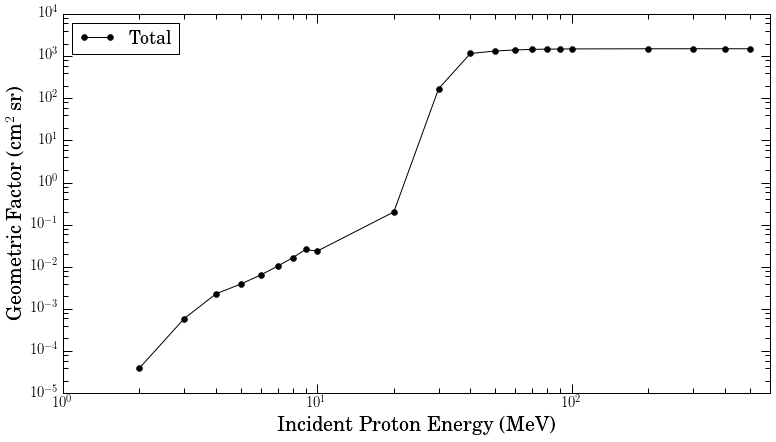

In [5]:
##########################################################################################
# Plot the Geometry Factor over a range of particle energies
figG, axG = plt.subplots(1,1)

plt.loglog(Data[:,0]/1000., G_Total, 'k.-', ms=12,linewidth=1, label="Total")
# plt.loglog(Data[:,0]/1000., G_Pair, 'b.-', linewidth=0.75, label="Pair Production")
# plt.errorbar(Data[:,0]/1000., G_Total, xerr=0, yerr=err_G_Total, fmt='.')

# Figure Properties
axG.set_ylabel(r'Geometric Factor (cm$^2$ sr)')  
axG.set_xlabel('Incident Proton Energy (MeV)') 
# axG.set_ylim(3e-4, 3e3)
axG.set_xlim(1, 600)

axG.legend(loc='upper left')

# Tight Layout
plt.tight_layout()

# Save the figure 
file_figG = 'Geometric_Factor_Proton_4U.pdf'
plt.savefig(DataFolder + file_figG, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_figG)


# print G_Total[23]
# Show the figure

Plot saved to: ../../G4AdEPTCubeSat_Results/Ar+CS2/4U/Protons_4U/Geometric_Factor_Error_Proton.pdf


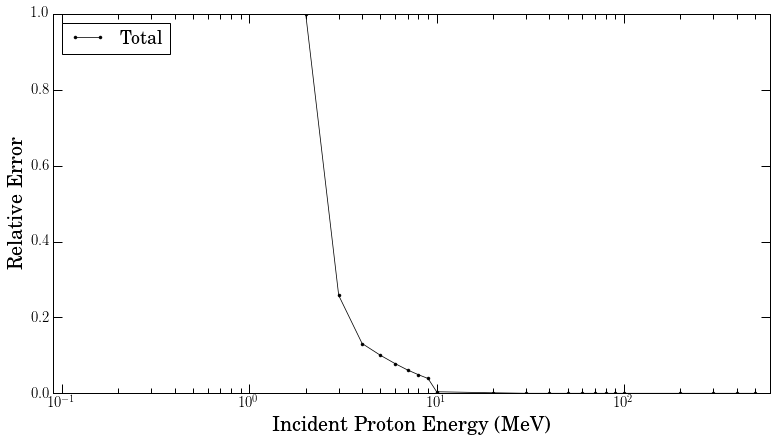

[             nan   9.99999995e+01   2.58198870e+01   1.31306395e+01
   1.00503732e+01   7.83259812e+00   6.14294303e+00   4.89701086e+00
   3.90433124e+00   4.08248278e-01   1.40027973e-01   4.82077445e-03
   1.83991467e-03   1.72231719e-03   1.66954568e-03   1.64574070e-03
   1.63318405e-03   1.62922428e-03   1.62407233e-03   1.61802456e-03
   1.61613056e-03   1.61705010e-03   1.61816971e-03]


In [6]:
##########################################################################################
# Plot the error in the Geometry Factor over a range of particle energies
figE, axE = plt.subplots(1,1)

# plt.plot(Data[:,0]/1000., relErr_G_Pair, 'b.:', linewidth=0.75, label="Pair Production")
plt.semilogx(Data[:,0]/1000., relErr_G_Total, 'k.-', linewidth=0.75, label="Total")

# Figure Properties
axE.set_ylabel(r'Relative Error')  
axE.set_xlabel('Incident Proton Energy (MeV)') 
# axE.set_ylim(0., 0.05)
axE.set_xlim(0.09, 600)

axE.legend(loc='upper left')

# Tight Layout
plt.tight_layout()

# Save the figure 
file_figE = 'Geometric_Factor_Error_Proton.pdf'
plt.savefig(DataFolder + file_figE, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_figE)

# Show the figure
plt.show(figE)
print relErr_G_Total*100.
# print relErr_G_Pair*100.

Plot saved to: ../../G4AdEPTCubeSat_Results/Ar+CS2/4U/Protons_4U/Proton_Flux.pdf


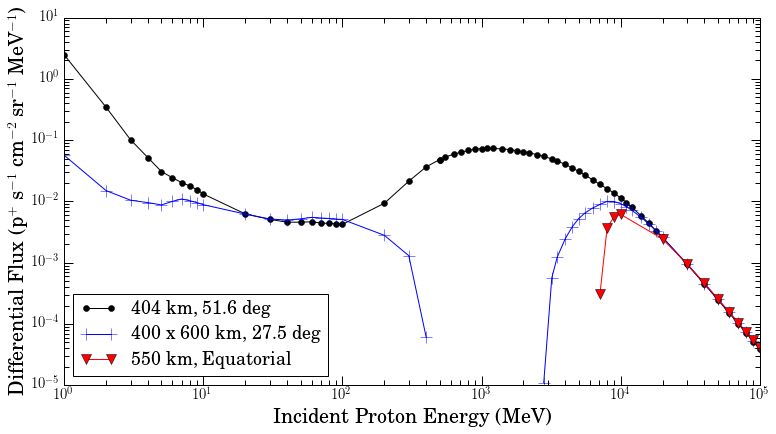

In [178]:
fluxData = []
fluxDataFile = '../../G4AdEPTCubeSat_Results/Ar+CS2/1U/Protons/Trapped_Proton_Flux.csv'
fluxDataFrame = pandas.read_csv(fluxDataFile, usecols=[1], comment='#',header=-1,dtype='float').values
fluxData = fluxDataFrame.flatten()
fluxData = fluxData/(4*np.pi)

fluxData2 = []
fluxDataFile2 = '../../G4AdEPTCubeSat_Results/Ar+CS2/1U/Protons/Trapped_Proton_Flux_400x600.csv'
fluxDataFrame2 = pandas.read_csv(fluxDataFile2, usecols=[1], comment='#',header=-1,dtype='float').values
fluxData2 = fluxDataFrame2.flatten()
fluxData2 = fluxData2/(4*np.pi)

fluxData3 = []
fluxDataFile3 = '../../G4AdEPTCubeSat_Results/Ar+CS2/1U/Protons/Trapped_Proton_Flux_eq.csv'
fluxDataFrame3 = pandas.read_csv(fluxDataFile3, usecols=[1], comment='#',header=-1,dtype='float').values
fluxData3 = fluxDataFrame3.flatten()
fluxData3 = fluxData3/(4*np.pi) # Makes values sr^-1

GCRfluxData = []
GCRfluxDataFile = '../../G4AdEPTCubeSat_Results/Ar+CS2/1U/Protons/GCR_Proton_Flux.csv'
GCRfluxDataFrame = pandas.read_csv(GCRfluxDataFile, usecols=[2], comment='#',header=-1,dtype='float').values
GCRfluxData = GCRfluxDataFrame.flatten() # values are already sr^-1
GCREnergy = pandas.read_csv(GCRfluxDataFile, usecols=[0], comment='#',header=-1,dtype='float').values

GCRfluxData2 = []
GCRfluxDataFile2 = '../../G4AdEPTCubeSat_Results/Ar+CS2/1U/Protons/GCR_Proton_Flux_400x600.csv'
GCRfluxDataFrame2 = pandas.read_csv(GCRfluxDataFile2, usecols=[1], comment='#',header=-1,dtype='float').values
GCRfluxData2 = GCRfluxDataFrame2.flatten() # values are already sr^-1
GCREnergy2 = pandas.read_csv(GCRfluxDataFile2, usecols=[0], comment='#',header=-1,dtype='float').values

GCRfluxData3 = []
GCRfluxDataFile3 = '../../G4AdEPTCubeSat_Results/Ar+CS2/1U/Protons/GCR_Proton_Flux_eq.csv'
GCRfluxDataFrame3 = pandas.read_csv(GCRfluxDataFile3, usecols=[1], comment='#',header=-1,dtype='float').values
GCRfluxData3 = GCRfluxDataFrame3.flatten() # values are already sr^-1
GCREnergy3 = pandas.read_csv(GCRfluxDataFile3, usecols=[0], comment='#',header=-1,dtype='float').values


figF, axF = plt.subplots(1,1)

fluxData[9:] = fluxData[9:] + GCRfluxData[:23]#Add the GCR Flux

plt.loglog(InputEnergies[:len(InputEnergies)]/1000.,fluxData[9:],'k.-',ms=12,linewidth=1.,label="404 km, 51.6 deg")
plt.loglog(InputEnergies[:len(InputEnergies)]/1000.,fluxData2[9:],'b+-',ms=12,linewidth=1.,label="400 x 600 km, 27.5 deg")
plt.loglog(InputEnergies[:len(InputEnergies)]/1000.,fluxData3[9:],'rv-',ms=10,linewidth=1.,label="550 km, Equatorial")

plt.loglog(GCREnergy[22:],GCRfluxData[22:],'k.-',ms=12,linewidth=1.)
plt.loglog(GCREnergy2,GCRfluxData2,'b+-',ms=12,linewidth=1.)
plt.loglog(GCREnergy3,GCRfluxData3,'rv-', ms=10,linewidth=1.)

axF.set_ylabel(r'Differential Flux (p$^{+}$ s$^{-1}$ cm$^{-2}$ sr$^{-1}$ MeV$^{-1}$)')
axF.set_xlabel('Incident Proton Energy (MeV)')
# axF.set_xlim(1e0,5e2)
# axF.set_ylim(1e-2, 1e6)
plt.tight_layout()

axF.legend(loc='lower left')

# Save the figure 
file_figF = 'Proton_Flux.pdf'
plt.savefig(DataFolder + file_figF, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_figF)

plt.show(figF)

23 40
63 63
Plot saved to: ../../G4AdEPTCubeSat_Results/Ar+CS2/4U/Protons_4U/Proton_Differential_Count_Rate_4U.pdf


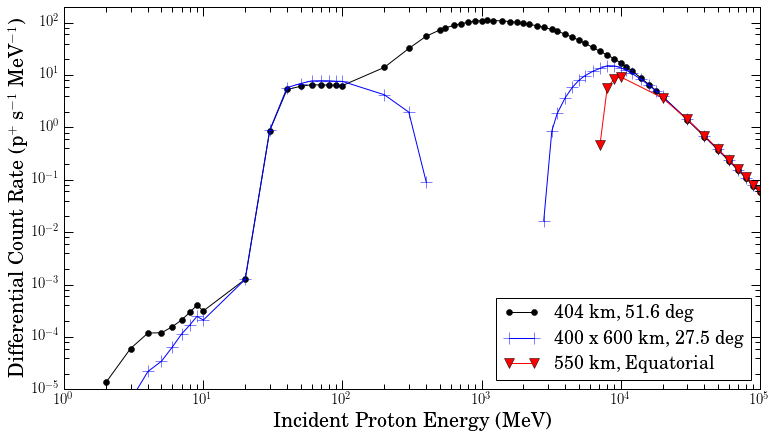

In [179]:
G_Total1 = np.ones(len(GCRfluxData[23:]))*1.502e3
# G_Total1 = np.append(G_Total,G_Total1)
G_Total2 = np.ones(len(GCRfluxData2))*1.502e3
# G_Total2 = np.append(G_)
G_Total3 = np.ones(len(GCRfluxData3))*1.502e3

diffCountRate1 = G_Total*fluxData[9:]
diffCountRate2 = G_Total*fluxData2[9:]
diffCountRate3 = G_Total*fluxData3[9:]

GTotal = np.append(G_Total,G_Total1)
diffCountRateGCR1 = GTotal[23:]*GCRfluxData[23:]
diffCountRateGCR2 = G_Total2*GCRfluxData2
diffCountRateGCR3 = G_Total3*GCRfluxData3
# diffCountRate_Pair = G_Pair*fluxData
print len(diffCountRate1), len(diffCountRateGCR1)
TotalEnergy2 = np.append(InputEnergies/1000.,GCREnergy[23:37])
TotalEnergy2 = np.append(TotalEnergy2,GCREnergy2)
TotalEnergy2 = TotalEnergy2.flatten()

TotalEnergy3 = np.append(InputEnergies/1000.,GCREnergy[23:44])
TotalEnergy3 = np.append(TotalEnergy3,GCREnergy3)
TotalEnergy3 = TotalEnergy3.flatten()

diffCountRateTotal1 = np.append(diffCountRate1,diffCountRateGCR1)

diffCountRateTotal2 = np.append(diffCountRate2,np.zeros(len(GCREnergy[23:37])))
diffCountRateTotal2 = np.append(diffCountRateTotal2,diffCountRateGCR2)

diffCountRateTotal3 = np.append(diffCountRate3,np.zeros(len(GCREnergy[23:44])))
diffCountRateTotal3 = np.append(diffCountRateTotal3,diffCountRateGCR3)

figD, axD = plt.subplots(1,1)

print len(GCREnergy),len(diffCountRateTotal1)

# plt.loglog(InputEnergies[:len(InputEnergies)-1]/1000.,diffCountRate1,'k.-',ms=12,linewidth=1.,label='404 km, 51.6 deg')
# plt.loglog(GCREnergy,diffCountRate1,'k.-',ms=12,linewidth=1.,label='404 km, 51.6 deg')
# plt.loglog(InputEnergies[:len(InputEnergies)-1]/1000.,diffCountRate2,'b+-',ms=12,linewidth=1.,label='400 x 600 km, 27.5 deg')
# plt.loglog(InputEnergies[:len(InputEnergies)-1]/1000.,diffCountRate3,'rv-',linewidth=0.75,label='550 km, Equatorial')
# plt.loglog(InputEnergies/1000.,diffCountRate_Pair,'b.-',linewidth=0.75,label='Pair Production')

# plt.loglog(GCREnergy,diffCountRateGCR1,'k.-',ms=12,linewidth=1.,label='404 km, 51.6 deg')
# plt.loglog(GCREnergy2,diffCountRateGCR2,'b+-',ms=12,linewidth=1.,label='400 x 600 km, 27.5 deg')
# plt.loglog(GCREnergy3,diffCountRateGCR3,'rv-',ms=10,linewidth=1.,label='550 km, Equatorial')

plt.loglog(GCREnergy,diffCountRateTotal1,'k.-',ms=12,linewidth=1.,label='404 km, 51.6 deg')
plt.loglog(TotalEnergy2,diffCountRateTotal2,'b+-',ms=12,linewidth=1.,label='400 x 600 km, 27.5 deg')
plt.loglog(TotalEnergy3,diffCountRateTotal3,'rv-',ms=10,linewidth=1.,label='550 km, Equatorial')

axD.set_ylabel(r'Differential Count Rate (p$^{+}$ s$^{-1}$ MeV$^{-1}$)')
axD.set_xlabel('Incident Proton Energy (MeV)')

# axD.set_xlim(1e0, 5e2)
axD.set_ylim(1e-5, 2e2)

axD.legend(loc='lower right')

plt.tight_layout()

file_figD = 'Proton_Differential_Count_Rate_4U.pdf'
plt.savefig(DataFolder + file_figD, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_figD)

plt.show(figD)

In [180]:
##########################################################################################
### False Positive Counts

# intCountRate_trial = simps(diffCountRate_Pair1) 

# # Simpson's Method
Energies_MeV = InputEnergies/1000.

# ##########################################################################################
# # Average Energy Method
def effEnergy(Energy1,Energy2):
    effEnergy1 = np.log(Energy2/Energy1)/(1./Energy1-1./Energy2)
    effEnergy2 = 1./((effEnergy1**2)*(1./Energy1-1./Energy2))
    return effEnergy1,effEnergy2    # effEnergy1 = 1./(<E>^2 * (1/E1 - 1/E2)

GCREnergy = GCREnergy.flatten()
GCREnergy2 = GCREnergy2.flatten()
GCREnergy3 = GCREnergy3.flatten()

inEnergy1 = 1.*GCREnergy[0:len(GCREnergy)-1]
inEnergy2 = 1.*GCREnergy[1:len(GCREnergy)]
[effecEnergyTotal1_1,effecEnergyTotal1_2] = effEnergy(inEnergy1,inEnergy2)    # <E>

inEnergy1 = 1.*GCREnergy2[0:len(GCREnergy2)-1]
inEnergy2 = 1.*GCREnergy2[1:len(GCREnergy2)]
[effecEnergyTotal2_1,effecEnergyTotal2_2] = effEnergy(inEnergy1,inEnergy2)    # <E>

inEnergy1 = 1.*GCREnergy3[0:len(GCREnergy3)-1]
inEnergy2 = 1.*GCREnergy3[1:len(GCREnergy3)]
[effecEnergyTotal3_1,effecEnergyTotal3_2] = effEnergy(inEnergy1,inEnergy2)    # <E>

##########################################################################################
##########################################################################################
### Proton Counts
# Simpson's method
intCountRate1 = np.array([])
intCountRate2 = np.array([])
intCountRate3 = np.array([])

Counts = 0
for i in range(0,len(InputEnergies)-1):    # Modified Simpson's rule with variable energy spacing
    dE = Energies_MeV[i+1]-Energies_MeV[i]
    Counts = trapz(diffCountRate1[i:i+2],dx=dE)# Energies_MeV[i:i+2])# # Using dE or Energies_MeV gives the same answer
    intCountRate1 = np.append(intCountRate1,Counts)

Counts = 0
for i in range(0,len(InputEnergies)-1):    # Modified Simpson's rule with variable energy spacing
    dE = Energies_MeV[i+1]-Energies_MeV[i]
    Counts = trapz(diffCountRate2[i:i+2],dx=dE)# Energies_MeV[i:i+2])# # Using dE or Energies_MeV gives the same answer
    intCountRate2 = np.append(intCountRate2,Counts)

Counts = 0
for i in range(0,len(InputEnergies)-1):    # Modified Simpson's rule with variable energy spacing
    dE = Energies_MeV[i+1]-Energies_MeV[i]
    Counts = trapz(diffCountRate3[i:i+2],dx=dE)# Energies_MeV[i:i+2])# # Using dE or Energies_MeV gives the same answer
    intCountRate3 = np.append(intCountRate3,Counts)

intCountRate1_Simp = sum(intCountRate1)
intCountRate2_Simp = sum(intCountRate2)
intCountRate3_Simp = sum(intCountRate3)

##########################################################################################
# Average Energy Method
diffCountRateGCR1 = GTotal[:]*GCRfluxData[:]
print len(diffCountRateGCR1), len(GTotal), len(GCRfluxData), len(GCREnergy)

diffCountRateTotal1[0:len(diffCountRate1)] = diffCountRate1+diffCountRateGCR1[0:len(diffCountRate1)]
diffCountRateTotal1[len(diffCountRate1):] = diffCountRateGCR1[len(diffCountRate1):]

diffCountRate_1 = diffCountRateTotal1[0:len(effecEnergyTotal1_2)]/effecEnergyTotal1_2
diffCountRate_2 = diffCountRateGCR2[0:len(effecEnergyTotal2_2)]/effecEnergyTotal2_2
diffCountRate_3 = diffCountRateGCR3[0:len(effecEnergyTotal3_2)]/effecEnergyTotal3_2

diffCountRate_1 = diffCountRate_1.flatten()
diffCountRate_2 = diffCountRate_2.flatten()
diffCountRate_3 = diffCountRate_3.flatten()

revDiffCountRate_1 = diffCountRate_1[::-1]
revDiffCountRate_2 = diffCountRate_2[::-1]
revDiffCountRate_3 = diffCountRate_3[::-1]

intCountRateGCR_1 = np.array([])
intCountRateGCR_2 = np.array([])
intCountRateGCR_3 = np.array([])

counts = 0
for i in range(0,len(diffCountRateTotal1)):
    counts = sum(revDiffCountRate_1[0:i])
    intCountRateGCR_1 = np.append(intCountRateGCR_1, counts)
    
counts = 0
for i in range(0,len(diffCountRateGCR2)):
    counts = sum(revDiffCountRate_2[0:i])
    intCountRateGCR_2 = np.append(intCountRateGCR_2, counts)
    
counts = 0
for i in range(0,len(diffCountRateGCR3)):
    counts = sum(revDiffCountRate_3[0:i])
    intCountRateGCR_3 = np.append(intCountRateGCR_3, counts)

# print len(effecEnergyGCR1_2), len(diffCountRateGCR1), len(diffCountRate_1), len(revDiffCountRate_1), len(intCountRate_1)
# print len(effecEnergyGCR2_2), len(diffCountRateGCR2), len(diffCountRate_2), len(revDiffCountRate_2), len(intCountRate_2)
# print len(effecEnergyGCR3_2), len(diffCountRateGCR3), len(diffCountRate_3), len(revDiffCountRate_3), len(intCountRate_3)
    
intCountRateGCR_1 = intCountRateGCR_1[::-1]
intCountRateGCR_2 = intCountRateGCR_2[::-1]
intCountRateGCR_3 = intCountRateGCR_3[::-1]

######
inEnergy1 = 1.*Energies_MeV[0:len(Energies_MeV)-1]
inEnergy2 = 1.*Energies_MeV[1:len(Energies_MeV)]
[effecEnergy1,effecEnergy2] = effEnergy(inEnergy1,inEnergy2)    # <E>

diffCountRate_1 = diffCountRateTotal1[0:len(effecEnergy2)]/effecEnergy2
diffCountRate_2 = diffCountRate2[0:len(effecEnergy2)]/effecEnergy2
diffCountRate_3 = diffCountRate3[0:len(effecEnergy2)]/effecEnergy2

diffCountRate_1 = diffCountRate_1.flatten()
diffCountRate_2 = diffCountRate_2.flatten()
diffCountRate_3 = diffCountRate_3.flatten()

revDiffCountRate_1 = diffCountRate_1[::-1]
revDiffCountRate_2 = diffCountRate_2[::-1]
revDiffCountRate_3 = diffCountRate_3[::-1]

intCountRate_1 = np.array([])
intCountRate_2 = np.array([])
intCountRate_3 = np.array([])

counts = 0
for i in range(0,len(diffCountRateTotal1)):
    counts = sum(revDiffCountRate_1[0:i])
    intCountRate_1 = np.append(intCountRate_1, counts)
    
counts = 0
for i in range(0,len(diffCountRate2)):
    counts = sum(revDiffCountRate_2[0:i])
#     print i,counts
    intCountRate_2 = np.append(intCountRate_2, counts)
    
counts = 0
for i in range(0,len(diffCountRate3)):
    counts = sum(revDiffCountRate_3[0:i])
    intCountRate_3 = np.append(intCountRate_3, counts)

# print len(effecEnergyGCR1_2), len(diffCountRateGCR1), len(diffCountRate_1), len(revDiffCountRate_1), len(intCountRate_1)
# print len(effecEnergyGCR2_2), len(diffCountRateGCR2), len(diffCountRate_2), len(revDiffCountRate_2), len(intCountRate_2)
# print len(effecEnergyGCR3_2), len(diffCountRateGCR3), len(diffCountRate_3), len(revDiffCountRate_3), len(intCountRate_3)
    
intCountRate_1 = intCountRate_1[::-1]
intCountRate_2 = intCountRate_2[::-1]
intCountRate_3 = intCountRate_3[::-1]


print "In ISS orbit: \t\t\t", max(intCountRate_1), " detections/s and "#, max(intFalseRate_1)*60*92.6318, " false positives per orbit" 
print "In 400x600 km, 27.5 deg orbit: \t", max(intCountRate_2), " detections/s and "#, max(intFalseRate_2)*60*92.6318, " false positives per orbit" 
print "In 550 km, 0 deg orbit: \t", max(intCountRate_3), " detections/s and "#, max(intFalseRate_3)*60*92.6318, " false positives per orbit" 

print "In ISS orbit: \t\t\t", max(intCountRate_1)*60*92.6318, " detections/orbit and "#, max(intFalseRate_1)*60*92.6318, " false positives per orbit" 
print "In 400x600 km, 27.5 deg orbit: \t", max(intCountRate_2)*60*94., " detections/orbit and "#, max(intFalseRate_2)*60*92.6318, " false positives per orbit" 
print "In 550 km, 0 deg orbit: \t", max(intCountRate_3)*60*95, " detections/orbit and "#, max(intFalseRate_3)*60*92.6318, " false positives per orbit" 

63 63 63 63
In ISS orbit: 			21135.5486004  detections/s and 
In 400x600 km, 27.5 deg orbit: 	1794.17241874  detections/s and 
In 550 km, 0 deg orbit: 	0.0  detections/s and 
In ISS orbit: 			117469434.651  detections/orbit and 
In 400x600 km, 27.5 deg orbit: 	10119132.4417  detections/orbit and 
In 550 km, 0 deg orbit: 	0.0  detections/orbit and 


ValueError: x and y must have same first dimension

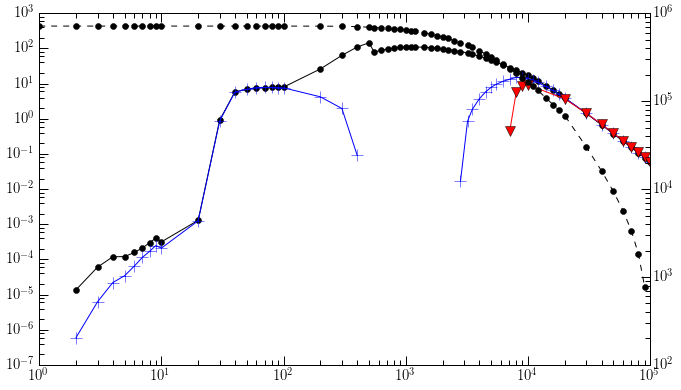

In [181]:
figD, axD = plt.subplots(1,1)

# axD.loglog(InputEnergies[0:len(InputEnergies)-1]/1000.,diffCountRate1,'k.-',ms=12,linewidth=1.,label='404 km, 51.6 deg')
# axD.loglog(InputEnergies[0:len(InputEnergies)-1]/1000.,diffCountRate2,'b+-',ms=12,linewidth=1.,label='400 x 600 km, 27.5 deg')
# axD.loglog(InputEnergies[0:len(InputEnergies)-1]/1000.,diffCountRate3,'rv-',ms=10,linewidth=1.,label='550 km, Equatorial')

axD.loglog(GCREnergy,diffCountRateTotal1,'k.-',ms=12,linewidth=1.,label='404 km, 51.6 deg')
axD.loglog(TotalEnergy2,diffCountRateTotal2,'b+-',ms=12,linewidth=1.,label='400 x 600 km, 27.5 deg')
axD.loglog(TotalEnergy3,diffCountRateTotal3,'rv-',ms=10,linewidth=1.,label='550 km, Equatorial')

axI = axD.twinx()
# axI.loglog(InputEnergies[0:len(InputEnergies)-1]/1000.,intCountRate_1,'k.--',ms=12,linewidth=1.)
# axI.loglog(InputEnergies[0:len(InputEnergies)-1]/1000.,intCountRate_2,'b+--',ms=12,linewidth=1.)
# axI.loglog(InputEnergies[0:len(InputEnergies)-1]/1000.,intCountRate_3,'rv--',ms=10,linewidth=1.)

axI.loglog(GCREnergy[0:],intCountRateGCR_1,'k.--',ms=12,linewidth=1.)
axI.loglog(TotalEnergy2[0:],intCountRateGCR_2,'b+--',ms=12,linewidth=1.)
axI.loglog(TotalEnergy3[0:],intCountRateGCR_3,'rv--',ms=10,linewidth=1.)


axD.set_ylabel(r'-- Differential Count Rate (p$^{+}$ s$^{-1}$ MeV$^{-1}$)')
axI.set_ylabel(r'- - Integral Count Rate (p$^{+}$ s$^{-1}$)')
axD.set_xlabel('Incident Proton Energy (MeV)')
# axD.set_xlim(1e0,1e1)

plt.tight_layout()

# axD.legend(loc='lower right')

file_figD = 'Proton_Differential_Integral_Count_Rate_4U.pdf'
plt.savefig(DataFolder + file_figD, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_figD)

plt.show(figD)

40 40
63
Plot saved to: ../../G4AdEPTCubeSat_Results/Ar+CS2/4U/Protons_4U/Trapped_GCR_Proton_Counts_AP8.pdf


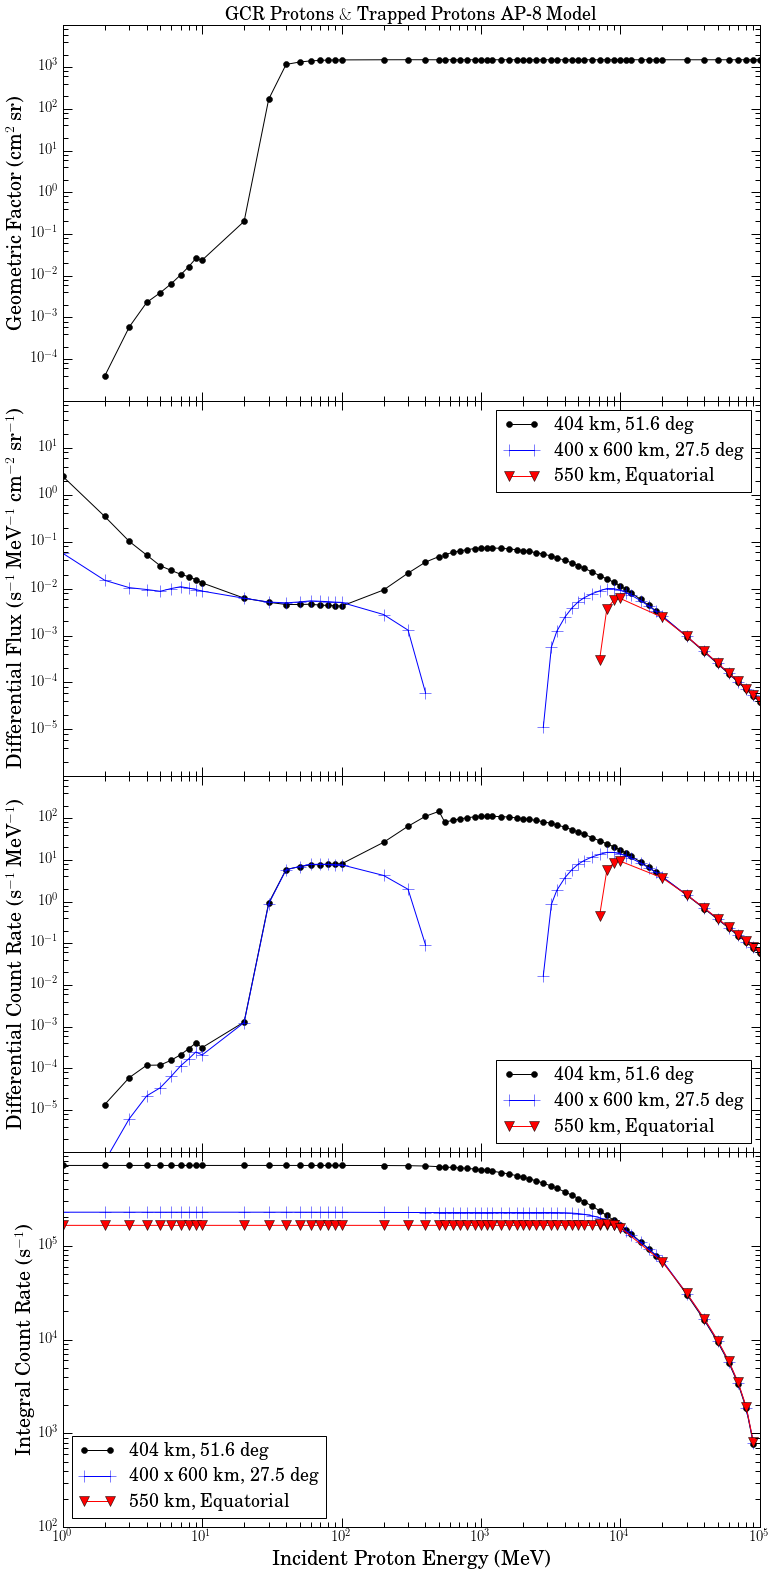

In [182]:
##########################################################################################
# Plot all of the plots together
fig_size = [7.3*1.5,4.2*1.5]
figG, (axG,axF,axD,axI) = plt.subplots(4, sharex=True,figsize=(fig_size[0],fig_size[1]*3.5))
GTotal = np.append(G_Total,G_Total1)
# diffCountRateGCR1 = GTotal*GCRfluxData[:]
axG.loglog(GCREnergy, GTotal, 'k.-', ms=12,linewidth=1)

axF.loglog(InputEnergies[:len(InputEnergies)]/1000.,fluxData[9:],'k.-',ms=12,linewidth=1.,label="404 km, 51.6 deg")
axF.loglog(InputEnergies[:len(InputEnergies)]/1000.,fluxData2[9:],'b+-',ms=12,linewidth=1.,label="400 x 600 km, 27.5 deg")
axF.loglog(InputEnergies[:len(InputEnergies)]/1000.,fluxData3[9:],'rv-',ms=10,linewidth=1.,label="550 km, Equatorial")

axF.loglog(GCREnergy[23:],GCRfluxData[23:],'k.-',ms=12,linewidth=1.)
axF.loglog(GCREnergy2,GCRfluxData2,'b+-',ms=12,linewidth=1.)
axF.loglog(GCREnergy3,GCRfluxData3,'rv-', ms=10,linewidth=1.)



print len(GCREnergy[23:]), len(diffCountRateGCR1[23:])
diffCountRateTotal1[0:len(diffCountRate1)] = diffCountRate1+diffCountRateGCR1[0:len(diffCountRate1)]
diffCountRateTotal1[len(diffCountRate1):] = diffCountRateGCR1[len(diffCountRate1):]

axD.loglog(GCREnergy[:],diffCountRateTotal1[:],'k.-',ms=12,linewidth=1.,label='404 km, 51.6 deg')
axD.loglog(InputEnergies[:len(InputEnergies)]/1000.,diffCountRate2,'b+-',ms=12,linewidth=1.,label='400 x 600 km, 27.5 deg')
axD.loglog(InputEnergies[:len(InputEnergies)]/1000.,diffCountRate3,'rv-',ms=10,linewidth=1.,label='550 km, Equatorial')

# axD.loglog(GCREnergy[23:],diffCountRateGCR1[23:],'k.-',ms=12,linewidth=1.)
axD.loglog(GCREnergy2,diffCountRateGCR2,'b+-',ms=12,linewidth=1.)
axD.loglog(GCREnergy3,diffCountRateGCR3,'rv-',ms=10,linewidth=1.)






intCountRate_22 = np.ones(36)*max(intCountRate_2)
intCountRate_32 = np.ones(48)*max(intCountRate_3)

# print len(GCREnergy), len(intCountRateGCR_3)
# axI.loglog(GCREnergy,intCountRateGCR_1,'k.-',ms=12,linewidth=1.,label='404 km, 51.6 deg')
intCountRateTotal_2 = np.zeros(len(GCREnergy))

GCREnergyNew = np.append(GCREnergy[:48],GCREnergy3)
intCountRateTotal_3 = np.zeros(len(GCREnergyNew))

intCountRateTotal_2[37:64] = intCountRateGCR_2
intCountRateTotal_2[0:23] = intCountRate_2+intCountRateTotal_2[37]
intCountRateTotal_2[23:37] = intCountRateTotal_2[37]

intCountRateTotal_3[48:61] = intCountRateGCR_3
intCountRateTotal_3[0:23] = intCountRate_3+intCountRateTotal_3[50]
intCountRateTotal_3[23:48] = intCountRateTotal_3[50]

intCountRateTotal_1 = np.zeros(len(GCREnergy))
print len(intCountRateGCR_1)
# intCountRateTotal_1[0:24] = intCountRate
axI.loglog(GCREnergy,intCountRateGCR_1,'k.-',ms=12,linewidth=1.,label='404 km, 51.6 deg')
axI.loglog(GCREnergy,intCountRateTotal_2,'b+-',ms=12,linewidth=1.,label='400 x 600 km, 27.5 deg')
axI.loglog(GCREnergyNew,intCountRateTotal_3,'rv-',ms=10,linewidth=1.,label='550 km, Equatorial')

# axI.loglog(GCREnergy[0:36],intCountRate_22,'b+-',ms=12,linewidth=1.)
# axI.loglog(GCREnergy[0:48],intCountRate_32,'rv-',ms=10,linewidth=1.)

# axI.loglog(GCREnergy,intCountRate_1,'k.-',ms=12,linewidth=1.,label='404 km, 51.6 deg')
# axI.loglog(InputEnergies[:len(InputEnergies)]/1000.,intCountRate_2,'b+-',ms=12,linewidth=1.,label='400 x 600 km, 27.5 deg')
# axI.loglog(InputEnergies[:len(InputEnergies)]/1000.,intCountRate_3,'rv-',ms=10,linewidth=1.,label='550 km, Equatorial')

xmin = 1e0
xmax = 1e5
# Figure Properties
axG.set_title('GCR Protons $\&$ Trapped Protons AP-8 Model', fontsize=18)
axI.set_xlabel('Incident Proton Energy (MeV)')
axG.set_ylabel('Geometric Factor (cm$^2$ sr)')   
axF.set_ylabel('Differential Flux (s$^{-1}$ MeV$^{-1}$ cm$^{-2}$ sr$^{-1}$)')  
axD.set_ylabel('Differential Count Rate (s$^{-1}$ MeV$^{-1}$)')
axI.set_ylabel('Integral Count Rate (s$^{-1}$)')
axG.set_xlim(xmin, xmax)
axF.set_xlim(xmin, xmax)
axD.set_xlim(xmin, xmax)
axI.set_xlim(xmin, xmax)
axF.set_ylim(1e-6,1e2)
axD.set_ylim(1e-6,1e3)
axI.set_ylim(1e2,1e6)
axG.set_yticks([1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3])
axF.set_yticks([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1])
axD.set_yticks([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2])
axI.set_yticks([1e2, 1e3, 1e4, 1e5])

axF.legend(loc='best')
axD.legend(loc='best')
axI.legend(loc='best')

# Fine-tune figure 
# Make subplots close to each other
figG.tight_layout()
figG.subplots_adjust(hspace=0)

# Save the figure 
fileG = 'Trapped_GCR_Proton_Counts_AP8.pdf'
plt.savefig(DataFolder + fileG, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+fileG)

# Show the figure
plt.show(figG)

0.0917002148691
204242.658628


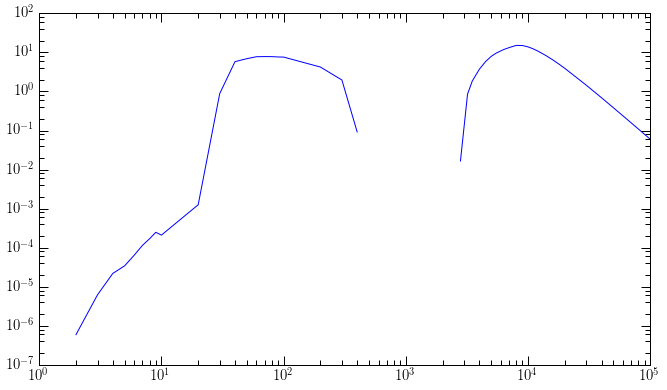

In [13]:
print diffCountRateTotal2[21]
# print diffCountRateTotal2
# print intCountRate_2
intcount=np.array([])
count=np.array([])
count = diffCountRateTotal2*TotalEnergy2
count = count[::-1]
# print count

intCountRate1 = np.array([])

Counts = 0
# for i in range(0,len(TotalEnergy2)-1):    # Modified Simpson's rule with variable energy spacing
#     dE = TotalEnergy2[i+1]-TotalEnergy2[i]
#     Counts = trapz(diffCountRateTotal2[i:i+2],dx=dE)# Energies_MeV[i:i+2])# # Using dE or Energies_MeV gives the same answer
#     intCountRate1 = np.append(intCountRate1,Counts)
intCountRate1 = trapz(diffCountRateTotal2,TotalEnergy2)
print intCountRate1
# plt.loglog(TotalEnergy2[:len(TotalEnergy2)], intCountRate1)
plt.loglog(TotalEnergy2, diffCountRateTotal2)